# Proyek Klasifikasi Gambar: Dataset Gambar 3 Jenis Hewan (Butterfly vs Elephant vs Sheep)
- **Nama:** Abid Juliant Indraswara
- **Email:** abidjuliant@gmail.com
- **ID Dicoding:** abidindraswara

Projek ini akan menghasilkan sebuah model machine learning yang mengklasifikasikan 3 jenis hewan yaitu Butterfly, Elephant dan Sheep. Terdiri dengan masing-masing kurang lebih 1000 sampel data gambar atau secara keseluruhan kurang lebih 3000 data gambar. Dataset tersedia di Kaggle secara open-source.

Link Dataset : https://www.kaggle.com/datasets/madisona/translated-animals10

## Import Library / Packages yang Diperlukan

Beberapa library yang dibutuhkan baik umum untuk pengolahan file sejenisnya, library untuk visualisasi, library untuk memproses data gambar, library untuk modelling machine learning dan library yang sifatnya tambahan sesuai kebutuhan.

### Library Umum

In [1]:
# Import Library Umum
import os, shutil
from shutil import copyfile
import zipfile
import random
from random import sample
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

### Library Visualisasi

In [2]:
# Import Library Visualisasi
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import seaborn as sns

### Library Pemrosesan Data Gambar

In [3]:
# Import Library Pemrosesan Data Gambar
import cv2
import skimage
from PIL import Image
from skimage import io
from skimage import img_as_ubyte
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

### Library untuk Modelling

In [4]:
# Import Library untuk Modelling
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, TensorBoard
from tensorflow.keras import regularizers

### Library Tambahan

In [5]:
# Import Library untuk Mengabaikan Peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

!pip install tensorflowjs
!pip install kaggle

In [6]:
# Cek Versi Tensorflow
print(tf.__version__)

2.18.0


## Data Preparation

### Import Dataset Gambar

Menggunakan Google Drive untuk import dataset dari luar Google Colab.

In [7]:
# Mengambil data melalui google drive dengan melakukan autentikasi akun

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# !pip install kaggle

In [9]:
# from google.colab import files
# files.upload()

In [10]:
# !chmod 600 /content/kaggle.json

In [11]:
# !kaggle datasets download -d madisona/translated-animals10 -p '/content/drive/My Drive/Dataset_MachineLearning/Dataset_Translated_Animals10'

In [12]:
# !kaggle datasets download -d marquis03/fruits-100 -p '/content/drive/My Drive/Dataset_MachineLearning/Dataset_Fruits100'

In [13]:
# Cek Folder
!ls '/content/drive/My Drive/Dataset_MachineLearning/Dataset_Translated_Animals10/'

translated-animals10.zip


### Data Loading

In [14]:
# Membuat direktori baru untuk menampung data gambar
!mkdir /content/animals_10

In [15]:
# Alternatif #1
# Import Dataset Gambar
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Translated_Animals10/translated-animals10.zip", 'r')
zip_ref.extractall("/content/animals_10")
zip_ref.close()

In [16]:
print(len(os.listdir('/content/animals_10/animals10/raw-img/butterfly')))
print(len(os.listdir('/content/animals_10/animals10/raw-img/elephant')))
print(len(os.listdir('/content/animals_10/animals10/raw-img/sheep')))

2112
1446
1820


In [17]:
# Check File Dataset from rockpaperscissors Folder
isiFolder = os.listdir('/content/animals_10/animals10/raw-img')
jumlahButterfly = len(os.listdir('/content/animals_10/animals10/raw-img/butterfly'))
jumlahElephant = len(os.listdir('/content/animals_10/animals10/raw-img/elephant'))
jumlahSheep = len(os.listdir('/content/animals_10/animals10/raw-img/sheep'))

print(f"Isi Folder Dataset Animals10  : {isiFolder}")
print(f"Jumlah File Gambar Butterfly  : {jumlahButterfly}")
print(f"Jumlah File Gambar Elephant   : {jumlahElephant}")
print(f"Jumlah File Gambar Sheep      : {jumlahSheep}")

Isi Folder Dataset Animals10  : ['spider', 'dog', 'cow', 'butterfly', 'elephant', 'cat', 'chicken', 'squirrel', 'horse', 'sheep']
Jumlah File Gambar Butterfly  : 2112
Jumlah File Gambar Elephant   : 1446
Jumlah File Gambar Sheep      : 1820


### Foldering Data Gambar

In [18]:
# Membuat direktori untuk file training dan validation
base_dir = '/content/animals_10/animals10/raw-img'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [19]:
# Cek direktori training dan validation
print(train_dir)
print(validation_dir)

/content/animals_10/animals10/raw-img/train
/content/animals_10/animals10/raw-img/val


In [20]:
# Initiate Directory Rock Paper Scissor File
# Objective : Memudahkan pemanggilan file di dalam folder rock paper scissor,
#             untuk melakukan split file.
butterfly_dir = os.path.join(base_dir,'butterfly')
elephant_dir = os.path.join(base_dir, 'elephant')
sheep_dir = os.path.join(base_dir, 'sheep')

In [21]:
# Check Rock Paper Scissors Directory
print(butterfly_dir)
print(elephant_dir)
print(sheep_dir)

/content/animals_10/animals10/raw-img/butterfly
/content/animals_10/animals10/raw-img/elephant
/content/animals_10/animals10/raw-img/sheep


In [22]:
# Alternatif #2
# Unzip file animals.zip
# !mkdir animals_dcp
# !unzip -qq animals_dog_cat_panda.zip -d animals_dcp
# !ls animals_dcp

### Data Preprocessing

#### Train Test Split Dataset

In [23]:
# Split Train Data and Validation Data

# Train Validation - Butterfly
train_butterfly_dir, validation_butterfly_dir = train_test_split(os.listdir(butterfly_dir), test_size = 0.2)

# Train Validation - Elephant
train_elephant_dir, validation_elephant_dir = train_test_split(os.listdir(elephant_dir), test_size = 0.2)

# Train Validation - Sheep
train_sheep_dir, validation_sheep_dir = train_test_split(os.listdir(sheep_dir), test_size = 0.2)

In [24]:
# Initiate Directory butterfly elephant sheep train-validation File
# Objective : Memudahkan pemanggilan file di dalam folder train-validation butterfly,
#             train-validation elephant and train-validation sheep,
train_butterfly = os.path.join(train_dir, 'butterfly')
train_elephant = os.path.join(train_dir, 'elephant')
train_sheep = os.path.join(train_dir, 'sheep')
validation_butterfly = os.path.join(validation_dir, 'butterfly')
validation_elephant = os.path.join(validation_dir, 'elephant')
validation_sheep = os.path.join(validation_dir, 'sheep')

In [25]:
# Check butterfly elephant sheep Directory
print(train_butterfly)
print(train_elephant)
print(train_sheep)
print(validation_butterfly)
print(validation_elephant)
print(validation_sheep)

/content/animals_10/animals10/raw-img/train/butterfly
/content/animals_10/animals10/raw-img/train/elephant
/content/animals_10/animals10/raw-img/train/sheep
/content/animals_10/animals10/raw-img/val/butterfly
/content/animals_10/animals10/raw-img/val/elephant
/content/animals_10/animals10/raw-img/val/sheep


In [26]:
# Make Directory File for Split File to Training-Validation butterfly elephant sheep
if not os.path.exists(train_butterfly):
  os.mkdir(train_butterfly)
if not os.path.exists(train_elephant):
  os.mkdir(train_elephant)
if not os.path.exists(train_sheep):
  os.mkdir(train_sheep)

if not os.path.exists(validation_butterfly):
  os.mkdir(validation_butterfly)
if not os.path.exists(validation_elephant):
  os.mkdir(validation_elephant)
if not os.path.exists(validation_sheep):
  os.mkdir(validation_sheep)

In [27]:
# Copy Split File Data Train and Data Validation to New Directory that Make Before
for i in train_butterfly_dir:
  shutil.copy(os.path.join(butterfly_dir, i), os.path.join(train_butterfly, i))
for i in train_elephant_dir:
  shutil.copy(os.path.join(elephant_dir,i), os.path.join(train_elephant,i))
for i in train_sheep_dir:
  shutil.copy(os.path.join(sheep_dir,i), os.path.join(train_sheep,i))

for i in validation_butterfly_dir:
  shutil.copy(os.path.join(butterfly_dir, i), os.path.join(validation_butterfly,i))
for i in validation_elephant_dir:
  shutil.copy(os.path.join(elephant_dir,i), os.path.join(validation_elephant,i))
for i in validation_sheep_dir:
  shutil.copy(os.path.join(sheep_dir,i), os.path.join(validation_sheep,i))

In [28]:
 # Check File Dataset from animals Folder
jumlahTrainButterfly = len(os.listdir('/content/animals_10/animals10/raw-img/train/butterfly'))
jumlahTrainElephant = len(os.listdir('/content/animals_10/animals10/raw-img/train/elephant'))
jumlahTrainSheep = len(os.listdir('/content/animals_10/animals10/raw-img/train/sheep'))
jumlahValidationButterfly = len(os.listdir('/content/animals_10/animals10/raw-img/val/butterfly'))
jumlahValidationElephant = len(os.listdir('/content/animals_10/animals10/raw-img/val/elephant'))
jumlahValidationSheep = len(os.listdir('/content/animals_10/animals10/raw-img/val/sheep'))

print(f"Jumlah File Gambar Train Butterfly         : {jumlahTrainButterfly}")
print(f"Jumlah File Gambar Train Elephant          : {jumlahTrainElephant}")
print(f"Jumlah File Gambar Train Sheep             : {jumlahTrainSheep}")
print(f"Jumlah File Gambar Validation Butterfly    : {jumlahValidationButterfly}")
print(f"Jumlah File Gambar Validation Elephant     : {jumlahValidationElephant}")
print(f"Jumlah File Gambar Validation Sheep        : {jumlahValidationSheep}")

Jumlah File Gambar Train Butterfly         : 1689
Jumlah File Gambar Train Elephant          : 1156
Jumlah File Gambar Train Sheep             : 1456
Jumlah File Gambar Validation Butterfly    : 423
Jumlah File Gambar Validation Elephant     : 290
Jumlah File Gambar Validation Sheep        : 364


## Modelling

### Image Augmentation

In [29]:
# Menggunakan Image Data Generator untuk Image Augmentation
# Data Augmentation untuk pelatihan
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

In [30]:
batch_size = 32
# Menerapkan Image Augmentation Konfigurasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'categorical',
    # shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'categorical',
    # shuffle=True
)

Found 4301 images belonging to 3 classes.
Found 1077 images belonging to 3 classes.


### Cek Visual Sampel Gambar Setelah Preprocessing

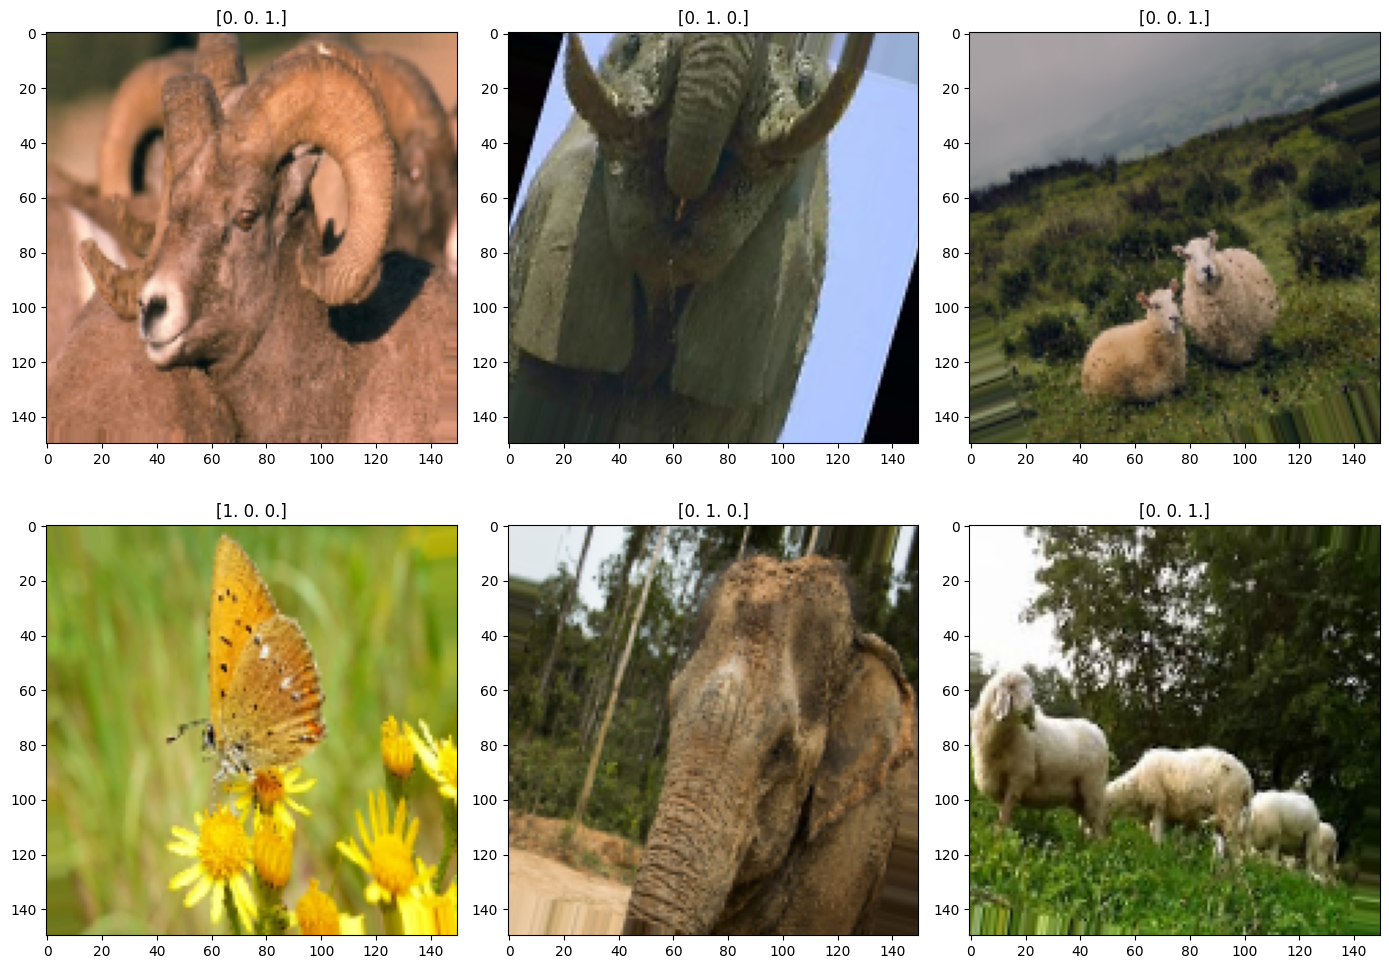

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
ax = ax.flatten()

for i in range(6):
    img, label = next(validation_generator)
    ax[i].imshow(img[0])
    ax[i].set_title(str(label[0]))

plt.tight_layout()
plt.show()


### Model Algorithm

In [32]:
tf.device('/device:GPU:0')

In [33]:
# Build Model using Neural Network in Tensorflow Library
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Menampilkan Summary Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,530,691 (51.62 MB)

 Trainable params: 13,530,691 (51.62 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile Model
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

print('Model telah dikompilasi!')

Model telah dikompilasi!


In [36]:
# Callback Function
# Objective : Digunakan untuk keluar dari suatu proses (disini saat epoch berjalan)
#             dengan memenuhi kriteria bila acuucary dan val_accuracy > 0.85
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.85 and logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.85:
                print("\nMencapai 85% nilai akurasi sehingga stop menjalankan training")
                self.model.stop_training = True

# Instantiate Class
callbacks = myCallback() # memanggil Callback Function

In [37]:
train_steps_per_epoch = len(train_generator) // batch_size
val_steps_per_epoch = len(validation_generator) // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
25/25 - 81s - 3s/step - accuracy: 0.4600 - loss: 1.0897 - val_accuracy: 0.6062 - val_loss: 0.7825
Epoch 2/100
25/25 - 71s - 3s/step - accuracy: 0.5575 - loss: 0.9132 - val_accuracy: 0.6000 - val_loss: 0.8233
Epoch 3/100
25/25 - 72s - 3s/step - accuracy: 0.6466 - loss: 0.7184 - val_accuracy: 0.7063 - val_loss: 0.7026
Epoch 4/100
25/25 - 71s - 3s/step - accuracy: 0.6750 - loss: 0.6616 - val_accuracy: 0.6812 - val_loss: 0.6238
Epoch 5/100
25/25 - 72s - 3s/step - accuracy: 0.6875 - loss: 0.6518 - val_accuracy: 0.8062 - val_loss: 0.5975
Epoch 6/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 30s - 1s/step - accuracy: 0.7437 - loss: 0.6318 - val_accuracy: 0.7437 - val_loss: 0.6675
Epoch 7/100
25/25 - 121s - 5s/step - accuracy: 0.7613 - loss: 0.5723 - val_accuracy: 0.7179 - val_loss: 0.5602
Epoch 8/100
25/25 - 72s - 3s/step - accuracy: 0.7663 - loss: 0.5497 - val_accuracy: 0.7688 - val_loss: 0.5527
Epoch 9/100
25/25 - 76s - 3s/step - accuracy: 0.8000 - loss: 0.4943 - val_accuracy: 0.8062 - val_loss: 0.4523
Epoch 10/100
25/25 - 71s - 3s/step - accuracy: 0.7900 - loss: 0.5117 - val_accuracy: 0.7625 - val_loss: 0.5321
Epoch 11/100
25/25 - 70s - 3s/step - accuracy: 0.7812 - loss: 0.5441 - val_accuracy: 0.7812 - val_loss: 0.5142
Epoch 12/100
25/25 - 31s - 1s/step - accuracy: 0.8188 - loss: 0.4419 - val_accuracy: 0.7188 - val_loss: 0.7128
Epoch 13/100
25/25 - 70s - 3s/step - accuracy: 0.7250 - loss: 0.6124 - val_accuracy: 0.7437 - val_loss: 0.6268
Epoch 14/100
25/25 - 70s - 3s/step - accuracy: 0.7837 - loss: 0.5130 - val_accuracy: 0.8205 - val_loss: 0.4842
Epoch 15/100
25/

## Evaluasi dan Visualisasi

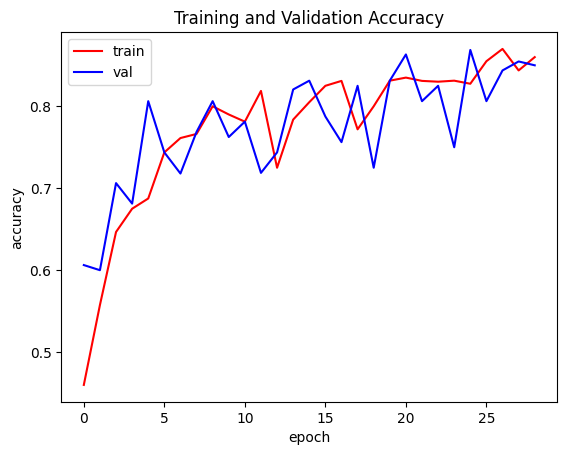

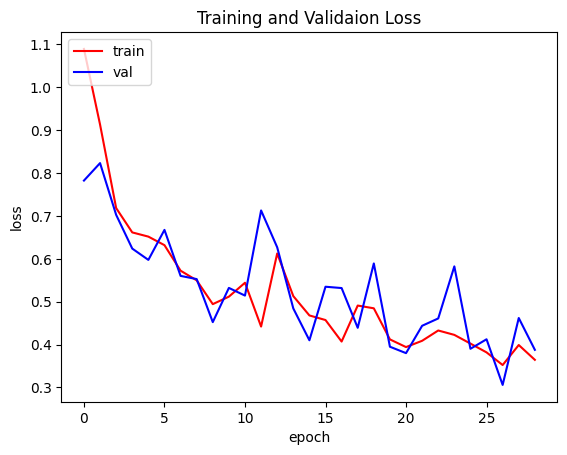

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

## Konversi Model

### Default Saved Model

In [39]:
tf.saved_model.save(model, 'saved_model')

### TFJS

In [40]:
!pip install tensorflowjs

In [41]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


### TFLite

In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

os.makedirs('tf_lite_model', exist_ok=True)
folder_path = 'tf_lite_model'
file_path = f'{folder_path}/model2.tflite'

with open(file_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpfjq5s6by'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140541166897808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166902560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166905200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166899216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166906256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166903616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166907840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166899744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166533472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140541166660672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14054116666401

In [43]:
def recreate_labels():
    labels = [folder for folder in os.listdir('/content/animals_10/animals10/raw-img') if not folder.startswith('.')]
    with open('tf_lite_model/labels.txt', 'w') as file:
        for label in labels:
            file.write(label)
            file.write('\n')
recreate_labels()

### Download Model ke lokal komputer

In [57]:
# Download Model ke lokal komputer
from google.colab import files

# Mendownload file tersebut
files.download('/content/tfjs_model/group1-shard13of13.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.5
astropy-iers-data==0.2024.11.4.0.33.34
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1